# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [3]:
import pandas as pd

## imports for Python, Pandas

In [6]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [169]:
# Exercise 1. 
import pandas as pd # Import the modules
import json
from pandas.io.json import json_normalize
import matplotlib as plt

In [2]:
wb_data = 'data/world_bank_projects.json' # load datapath into variable

In [11]:
wb_json = json.load((open(wb_data))) # load json file

In [63]:
#print out list of keys and values from two or 3 dicts in the list of dicts
for dict in wb_json[:2]:
    print('\n---\n')
    for key in dict.keys():
        print('key: '+ key + '    Value: ', dict[key])


---

key: sector    Value:  [{'Name': 'Primary education'}, {'Name': 'Secondary education'}, {'Name': 'Public administration- Other social services'}, {'Name': 'Tertiary education'}]
key: supplementprojectflg    Value:  N
key: projectfinancialtype    Value:  IDA
key: prodline    Value:  PE
key: mjtheme    Value:  ['Human development']
key: idacommamt    Value:  130000000
key: impagency    Value:  MINISTRY OF EDUCATION
key: project_name    Value:  Ethiopia General Education Quality Improvement Project II
key: mjthemecode    Value:  8,11
key: closingdate    Value:  2018-07-07T00:00:00Z
key: totalcommamt    Value:  130000000
key: id    Value:  P129828
key: mjsector_namecode    Value:  [{'code': 'EX', 'name': 'Education'}, {'code': 'EX', 'name': 'Education'}, {'code': 'BX', 'name': 'Public Administration, Law, and Justice'}, {'code': 'EX', 'name': 'Education'}]
key: docty    Value:  Project Information Document,Indigenous Peoples Plan,Project Information Document
key: sector1    Value:  {

In [83]:
wb_projects = json_normalize(wb_json, '_id', ['id','project_name','countrycode','countryshortname'],errors='ignore') # create table from json list of dicts
wb_projects.head() #print head of the table of projects

,0,id,project_name,countrycode,countryshortname
0,$oid,P129828,Ethiopia General Education Quality Improvement...,ET,Ethiopia
1,$oid,P144674,TN: DTF Social Protection Reforms Support,TN,Tunisia
2,$oid,P145310,Tuvalu Aviation Investment Project - Additiona...,TV,Tuvalu
3,$oid,P144665,Gov't and Civil Society Organization Partnership,RY,"Yemen, Republic of"
4,$oid,P144933,Second Private Sector Competitiveness and Econ...,LS,Lesotho


In [154]:
#agrigate the most common project countries 

codedict = {} #initialize a dictionary of country codes

for project in wb_json: #iterate through every dict (project) in the dataset
    code = project['countrycode'] #find the country code
    if code not in codedict: #if it's not in the code dict add it
        codedict[code] = 1
    else: 
        codedict[code] += 1 #if it is in the codedict count it up

# print out the top 10 number of projects per countrycode 
top10dict = {}
sortedcodelist = sorted(codedict, key=codedict.get, reverse=True)[:10] #sort the list and slice down to the top 10
for code in sortedcodelist:
    print('countrycode:' + code + ' Projects:' + str(codedict[code])) 

countrycode:CN Projects:19
countrycode:ID Projects:19
countrycode:VN Projects:17
countrycode:IN Projects:16
countrycode:RY Projects:13
countrycode:MA Projects:12
countrycode:NP Projects:12
countrycode:BD Projects:12
countrycode:MZ Projects:11
countrycode:3A Projects:11


  countrycode           Shortname  No.Projects
0          CN               China           19
1          ID           Indonesia           19
2          VN             Vietnam           17
3          IN               India           16
4          RY  Yemen, Republic of           13
5          MA             Morocco           12
6          NP               Nepal           12
7          BD          Bangladesh           12
8          MZ          Mozambique           11
9          3A              Africa           11


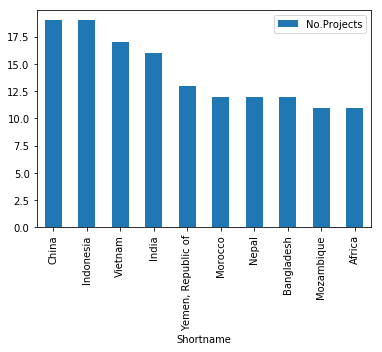

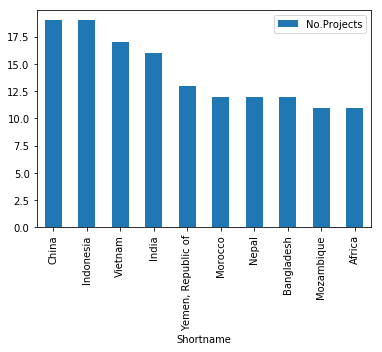

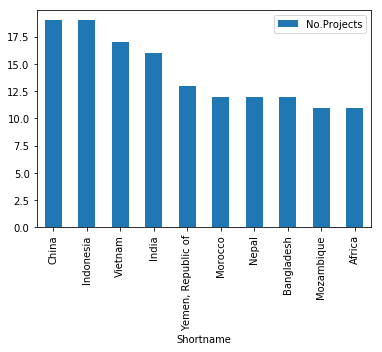

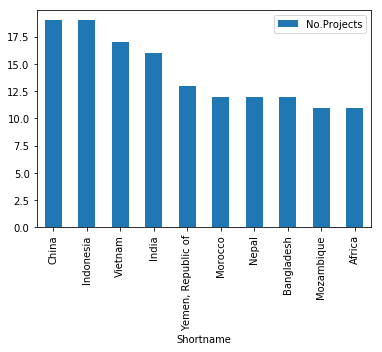

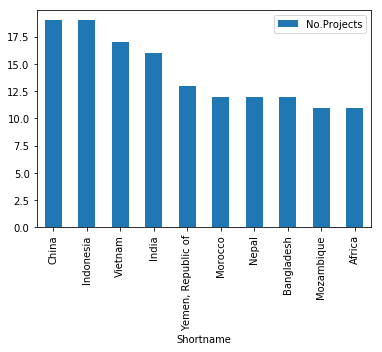

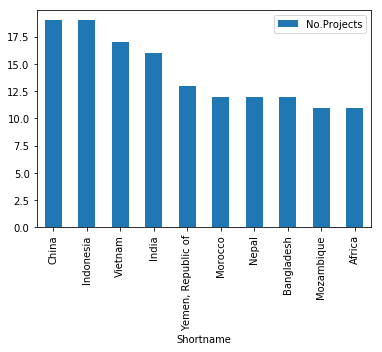

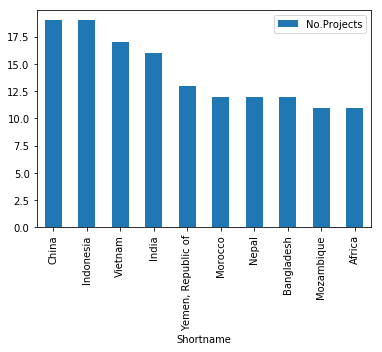

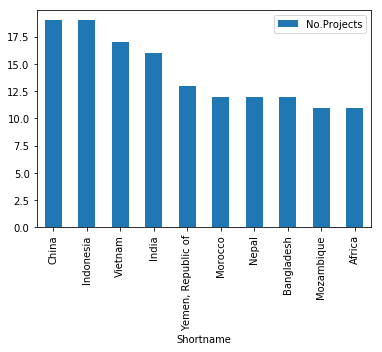

In [173]:
#make this look pretty with a dataframe and plot it. 
top10df = pd.DataFrame(sortedcodelist) # create a dataframe out of the sorted code list
top10df.columns = ['countrycode'] #label the country code column



#create the shortname column
shortname = []
for code in sortedcodelist:
    for project in wb_json:
        if project['countrycode'] == code:
            sname = project['countryshortname']
            if sname not in shortname:
                shortname.append(sname)
top10df['Shortname'] = shortname   

no_projects = [] # create the No. Projects column
for code in sortedcodelist:
    no_projects.append(codedict[code])
    
top10df['No.Projects'] = no_projects

#print the data frame
print(top10df)

top10df.plot(kind='bar', x='Shortname', y='No.Projects')
plt.pyplot.show()


In [3]:
wbdf = pd.read_json(wb_data) # read wb json data into data frame

In [4]:
wbdf.head() # take a look a the data frame - Continue from here tomorrow. You can do this with just the dataframe. Look it up. 

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...
